In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/home/chetan/ana/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/chetan/ana/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/chetan/ana/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/chetan/ana/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/chetan/ana/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. E

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11493376/11490434 [==============================] - 30s 3us/step


In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
single_image=x_train[0]

In [6]:
single_image.shape

(28, 28)

In [7]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

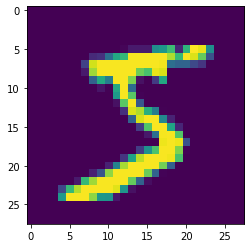

In [8]:
plt.imshow(single_image)

In [9]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
# 5 is not a continuous value but a category.
# So we need to one-hot-encode this.

In [11]:
from tensorflow.keras.utils import to_categorical

In [13]:
y_train.shape

(60000,)

In [14]:
y_example=to_categorical(y_train)

In [16]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [18]:
y_example.shape

(60000, 10)

In [19]:
y_cat_test=to_categorical(y_test,num_classes=10)

In [20]:
y_cat_train=to_categorical(y_train,10)

In [22]:
single_image.max()

255

In [23]:
single_image.min()

0

In [24]:
x_train=x_train/255

In [25]:
x_test=x_test/255

In [26]:
scaled_image=x_train[0]

In [28]:
scaled_image.max()

1.0

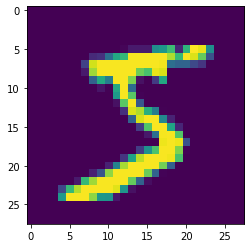

In [29]:
plt.imshow(scaled_image)

In [30]:
x_train.shape

(60000, 28, 28)

In [31]:
# 4th dimension to be added

In [32]:
#batch size,width,height,color_channels
x_train=x_train.reshape(60000,28,28,1)

In [33]:
x_test=x_test.reshape(10000,28,28,1)

In [34]:
from tensorflow.keras.models import Sequential

In [35]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [42]:
model=Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [43]:
from tensorflow.keras.callbacks import EarlyStopping

In [47]:
earlystop=EarlyStopping(monitor='val_loss',patience=1)

In [48]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[earlystop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 52s 872us/sample - loss: 0.1407 - accuracy: 0.9576 - val_loss: 0.0670 - val_accuracy: 0.9775
Epoch 2/10
60000/60000 [==============================] - 30s 504us/sample - loss: 0.0470 - accuracy: 0.9855 - val_loss: 0.0415 - val_accuracy: 0.9864
Epoch 3/10
60000/60000 [==============================] - 30s 502us/sample - loss: 0.0297 - accuracy: 0.9906 - val_loss: 0.0458 - val_accuracy: 0.9849


In [49]:
metrics=pd.DataFrame(model.history.history)

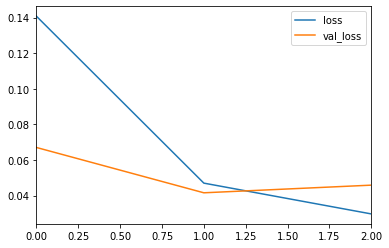

In [50]:
metrics[['loss','val_loss']].plot()

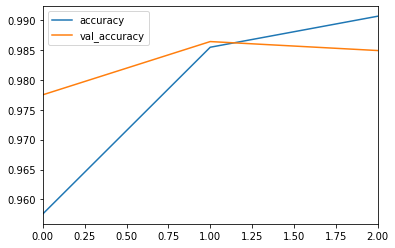

In [51]:
metrics[['accuracy','val_accuracy']].plot()

In [52]:
model.metrics_names

['loss', 'accuracy']

In [53]:
model.evaluate(x_test,y_cat_test,verbose=0)

[0.04582130930437706, 0.9849]

In [54]:
from sklearn.metrics import classification_report,confusion_matrix

In [60]:
predictions=model.predict_classes(x_test)

In [61]:
y_cat_test.shape

(10000, 10)

In [62]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [63]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.97      1.00      0.98      1010
           4       0.97      1.00      0.98       982
           5       0.98      0.99      0.98       892
           6       0.99      0.96      0.98       958
           7       0.99      0.98      0.99      1028
           8       0.99      0.98      0.98       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.99      0.98      0.98     10000



In [64]:
print(confusion_matrix(y_test,predictions))

[[ 975    0    0    1    0    1    2    0    1    0]
 [   0 1129    2    1    0    1    2    0    0    0]
 [   1    1 1014    6    3    0    0    5    2    0]
 [   0    0    1 1007    0    1    0    0    1    0]
 [   0    0    0    0  979    0    0    0    0    3]
 [   1    0    1    9    0  880    1    0    0    0]
 [   4    2    0    0   15   12  921    0    4    0]
 [   1    1    7    6    1    1    0 1008    1    2]
 [   5    0    3    1    1    4    0    2  952    6]
 [   0    2    0   10    8    2    0    3    0  984]]


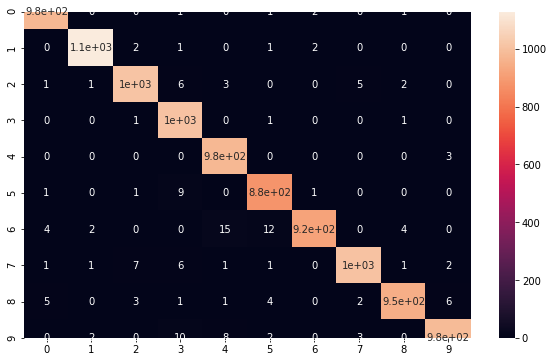

In [66]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

In [67]:
my_number=x_test[0]

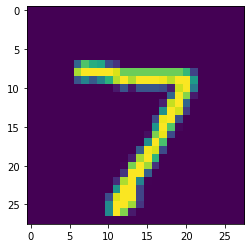

In [68]:
plt.imshow(my_number.reshape(28,28))

In [69]:
model.predict_classes(my_number.reshape(1,28,28,1))

array([7])